In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Load the dataset (assuming you've downloaded it to your working directory)
# The dataset is commonly named 'Unemployment_Rate_upto_11_2020.csv' for this task
df = pd.read_csv('Unemployment in india.csv')

# Look at the first few rows
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [5]:
# See the first few rows and column names
print(df.head())

# Print just the column names and the count
print(df.columns)
print(f"Number of columns: {len(df.columns)}")

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
     

In [6]:
# Provide a list with exactly 7 names to match the 7 columns
df.columns = ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate',
              'Estimated Employed', 'Estimated Labour Participation Rate',
              'Region']

# The rest of your code
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

print("\nSuccessfuly renamed columns and created new features!")
print(df.head())


Successfuly renamed columns and created new features!
            State       Date Frequency  Estimated Unemployment Rate  \
0  Andhra Pradesh 2019-05-31   Monthly                         3.65   
1  Andhra Pradesh 2019-06-30   Monthly                         3.05   
2  Andhra Pradesh 2019-07-31   Monthly                         3.75   
3  Andhra Pradesh 2019-08-31   Monthly                         3.32   
4  Andhra Pradesh 2019-09-30   Monthly                         5.17   

   Estimated Employed  Estimated Labour Participation Rate Region  Month  \
0          11999139.0                                43.24  Rural    5.0   
1          11755881.0                                42.05  Rural    6.0   
2          12086707.0                                43.50  Rural    7.0   
3          12285693.0                                43.97  Rural    8.0   
4          12256762.0                                44.68  Rural    9.0   

     Year  
0  2019.0  
1  2019.0  
2  2019.0  
3  2019.0  
4


Summary Statistics:
                                 Date  Estimated Unemployment Rate  \
count                            740                   740.000000   
mean   2019-12-12 18:36:58.378378496                    11.787946   
min              2019-05-31 00:00:00                     0.000000   
25%              2019-08-31 00:00:00                     4.657500   
50%              2019-11-30 00:00:00                     8.350000   
75%              2020-03-31 00:00:00                    15.887500   
max              2020-06-30 00:00:00                    76.740000   
std                              NaN                    10.721298   

       Estimated Employed  Estimated Labour Participation Rate       Month  \
count        7.400000e+02                           740.000000  740.000000   
mean         7.204460e+06                            42.630122    6.390541   
min          4.942000e+04                            13.330000    1.000000   
25%          1.190404e+06                   

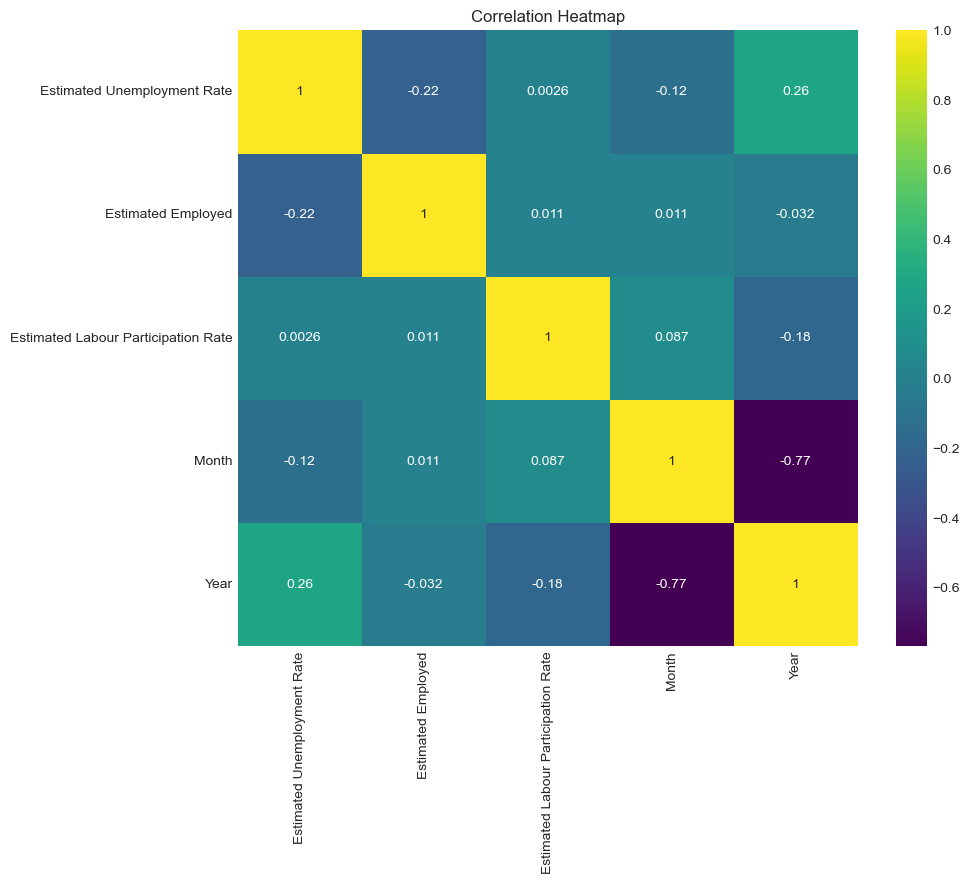

In [7]:
# Get summary statistics for the numerical columns
print("\nSummary Statistics:\n", df.describe())

# Create a heatmap to see the correlation between variables
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='viridis', annot=True)
plt.title('Correlation Heatmap')
plt.show()

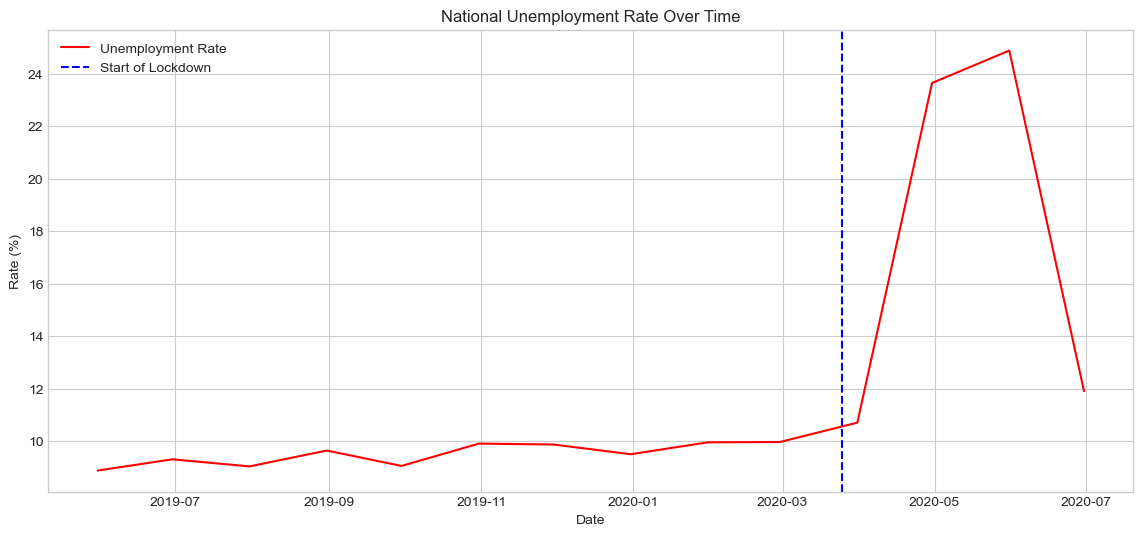

In [8]:
# Group data by date to see the national trend
national_trend = df.groupby(['Date'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean()
national_trend = national_trend.reset_index()

# Plot the national unemployment rate over time
plt.figure(figsize=(14, 6))
plt.title('National Unemployment Rate Over Time')
plt.plot(national_trend['Date'], national_trend['Estimated Unemployment Rate'], label='Unemployment Rate', color='red')
# Add a vertical line for the start of the lockdown
plt.axvline(dt.datetime(2020, 3, 25), color='blue', linestyle='--', label='Start of Lockdown')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.show()

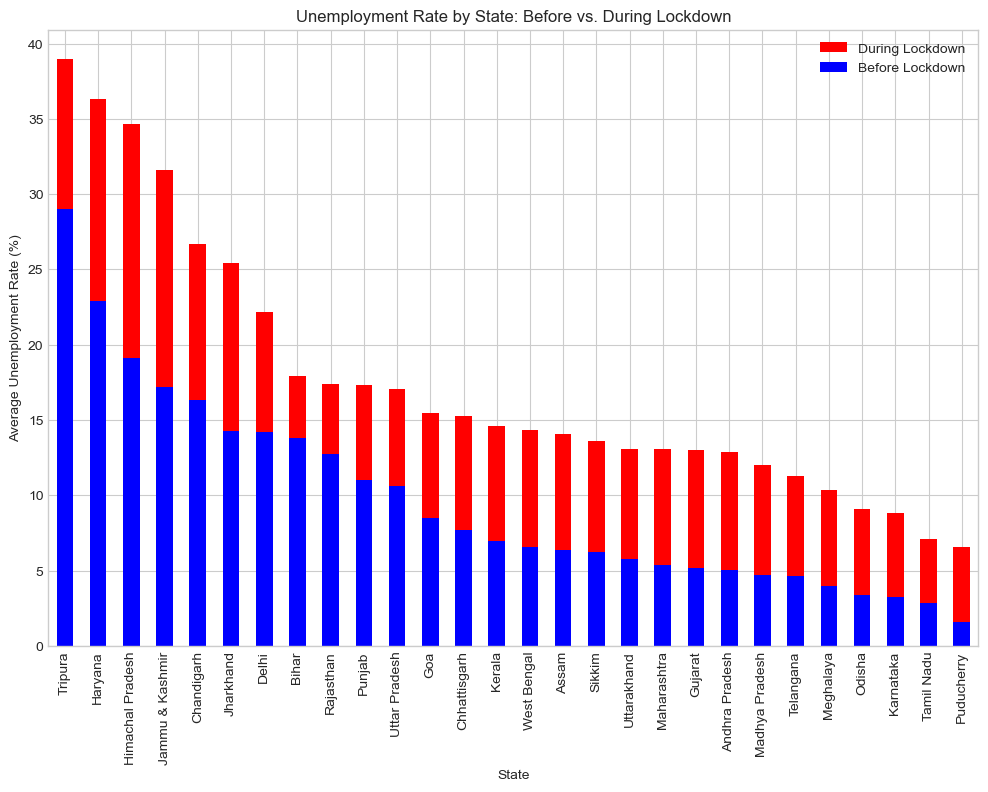

In [9]:
# Separate data into before and during lockdown periods
lockdown_start_date = pd.to_datetime('2020-03-25')
before_lockdown = df[df['Date'] < lockdown_start_date]
during_lockdown = df[df['Date'] >= lockdown_start_date]

# Calculate average unemployment rate by state for both periods
avg_rate_before = before_lockdown.groupby('State')['Estimated Unemployment Rate'].mean().sort_values(ascending=False)
avg_rate_during = during_lockdown.groupby('State')['Estimated Unemployment Rate'].mean().sort_values(ascending=False)

# Plot the comparison
plt.figure(figsize=(12, 8))
avg_rate_during.plot(kind='bar', color='red', label='During Lockdown')
avg_rate_before.plot(kind='bar', color='blue', label='Before Lockdown')
plt.title('Unemployment Rate by State: Before vs. During Lockdown')
plt.ylabel('Average Unemployment Rate (%)')
plt.legend()
plt.show()